Image Compression

MINI PROJECT DESCRIPTION

In [1]:
# Just to ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries

import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image
import pandas as pd

Step 1: Download the Dataset

Download the image in the following link:
https://robogarden.s3.us-west-2.amazonaws.com/content/mini-project/cat.png

Step 2: Reading an image

Read an image using matplotlib.
Hint: You can use any alternative library for reading images. Check out OpenCV, skimage, etc.

PNG
(490, 733)
RGB


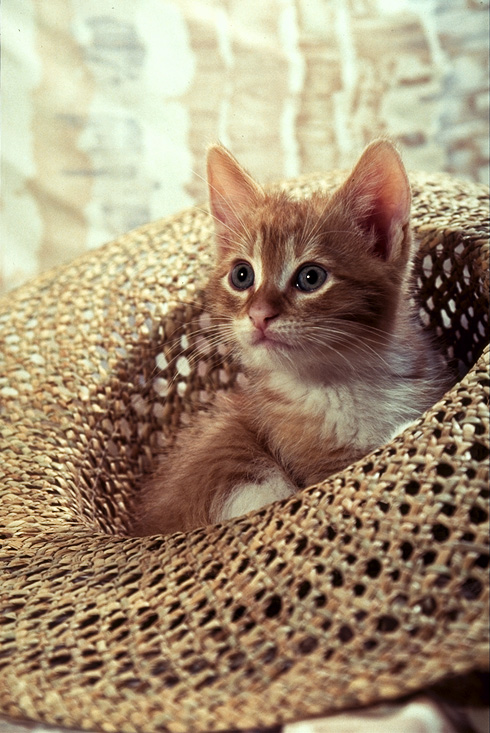

In [3]:
# Read the cat image and print its features

image=Image.open('cat.png')
print(image.format)
print(image.size)
print(image.mode)
image

Step 3: Re-organize

Re-organize the pixels as a 2D array with dimensions (number of pixels, 3).

In other words, a dataset with number of pixels samples and 3 columns.

In [4]:
#Convert the image into an array

image_arr=np.asarray(image)
print(type(image_arr))
print(image_arr.shape)
image_arr

<class 'numpy.ndarray'>
(733, 490, 3)


array([[[188, 201, 184],
        [221, 234, 216],
        [212, 226, 203],
        ...,
        [172, 191, 172],
        [177, 189, 175],
        [139, 156, 146]],

       [[185, 198, 181],
        [224, 237, 219],
        [211, 225, 202],
        ...,
        [168, 185, 167],
        [178, 189, 175],
        [132, 148, 138]],

       [[185, 198, 181],
        [220, 233, 215],
        [215, 229, 206],
        ...,
        [163, 176, 158],
        [173, 179, 167],
        [127, 140, 131]],

       ...,

       [[158, 145, 128],
        [155, 142, 125],
        [151, 138, 121],
        ...,
        [ 87,  68,  61],
        [101,  82,  75],
        [ 68,  59,  60]],

       [[156, 141, 122],
        [157, 142, 123],
        [151, 136, 117],
        ...,
        [ 91,  72,  65],
        [ 97,  78,  71],
        [ 67,  58,  59]],

       [[163, 148, 129],
        [166, 151, 132],
        [162, 147, 128],
        ...,
        [ 87,  68,  61],
        [ 97,  78,  71],
        [ 67,  58,  59]]

In [5]:
# Reorgnize the array into a 2D array with dimensions (number of pixels, 3)

reshaped_arr=np.reshape(image_arr,(359170 ,3))
reshaped_arr

array([[188, 201, 184],
       [221, 234, 216],
       [212, 226, 203],
       ...,
       [ 87,  68,  61],
       [ 97,  78,  71],
       [ 67,  58,  59]], dtype=uint8)

In [6]:
# alternate way to reorgnize the array into a 2D array with dimensions (number of pixels, 3)

#X = image_arr.reshape((-1, 3))
#X

In [7]:
# Put the array in a Pandas Dataframe to take advantage of Pandas tools

df = pd.DataFrame(reshaped_arr, columns=['A', 'B', 'C'])

In [8]:
df

,A,B,C
0,188,201,184
1,221,234,216
2,212,226,203
3,208,222,196
4,207,222,193
...,...,...,...
359165,84,65,58
359166,84,65,58
359167,87,68,61
359168,97,78,71


Step 4: Clustering

Use K-means to cluster the data into 10 clusters.

In [9]:
# Apply the KMeans Clustering Model

from sklearn.cluster import KMeans

n_clusters = 20

model = KMeans(n_clusters=n_clusters, random_state=0)

clusters = model.fit_predict(reshaped_arr) #alternatively we could have used the .labels_ attribute
centres = model.cluster_centers_

In [10]:
centres

array([[216.63321766, 206.99458098, 165.04168845],
       [105.58567543,  69.0889997 ,  55.11710487],
       [184.84487696, 151.18248833, 110.47682435],
       [ 48.59265876,  23.01047588,  17.98140328],
       [239.98676767, 251.02411545, 228.88694985],
       [135.14396171, 100.6121134 ,  79.26408321],
       [195.45198325, 169.96781631, 126.68103327],
       [ 71.04789201,  38.85583087,  30.70913462],
       [229.46499983, 236.54457489, 206.0733498 ],
       [169.10434622, 133.78854219,  99.68562474],
       [182.31245993, 183.6299423 , 159.41055781],
       [ 21.6431532 ,   7.70125909,   4.16649722],
       [226.88219274, 223.67330662, 184.64937945],
       [208.74494049, 188.90950281, 143.565396  ],
       [143.42276507, 124.22318087, 106.78950104],
       [121.29850111,  84.65388434,  66.54309896],
       [ 89.18744186,  54.10692506,  43.49958656],
       [165.645969  , 152.63688893, 128.53077135],
       [154.32156474, 114.99529952,  85.43343605],
       [205.16031011, 214.96658

In [11]:
# concert the float centers values to integer to facilicate image rendering

centres_int = np.uint8(centres)
centres_int

array([[216, 206, 165],
       [105,  69,  55],
       [184, 151, 110],
       [ 48,  23,  17],
       [239, 251, 228],
       [135, 100,  79],
       [195, 169, 126],
       [ 71,  38,  30],
       [229, 236, 206],
       [169, 133,  99],
       [182, 183, 159],
       [ 21,   7,   4],
       [226, 223, 184],
       [208, 188, 143],
       [143, 124, 106],
       [121,  84,  66],
       [ 89,  54,  43],
       [165, 152, 128],
       [154, 114,  85],
       [205, 214, 188]], dtype=uint8)

In [12]:
# Add clusters column to the Dataframe

df['clusters']=clusters.tolist()

In [13]:
df.head(2)

,A,B,C,clusters
0,188,201,184,19
1,221,234,216,8


Replace each pixel by its cluster center.

In [14]:
#Create a Dataframe for the Cluster_Centers. Then use this Dataframe to as a lookup table to replace pixel values
# in the image dataframe

df_centers = pd.DataFrame(centres_int, columns=['A', 'B', 'C'])
df_centers['clusters'] = np.arange(n_clusters)
df_centers

,A,B,C,clusters
0,216,206,165,0
1,105,69,55,1
2,184,151,110,2
3,48,23,17,3
4,239,251,228,4
5,135,100,79,5
6,195,169,126,6
7,71,38,30,7
8,229,236,206,8
9,169,133,99,9


In [15]:
# set index
df = df.set_index(['clusters'])
df

,A,B,C
clusters,,,
19,188,201,184
8,221,234,216
19,212,226,203
19,208,222,196
19,207,222,193
...,...,...,...
16,84,65,58
16,84,65,58
1,87,68,61


In [16]:
#Replace each pixel by its cluster center using the the centers dataframe as a lookup table 

df.update(df_centers.set_index(['clusters']))
df

,A,B,C
clusters,,,
19,205,214,188
8,229,236,206
19,205,214,188
19,205,214,188
19,205,214,188
...,...,...,...
16,89,54,43
16,89,54,43
1,105,69,55


In [17]:
# reset index
df = df.reset_index()
df

,clusters,A,B,C
0,19,205,214,188
1,8,229,236,206
2,19,205,214,188
3,19,205,214,188
4,19,205,214,188
...,...,...,...,...
359165,16,89,54,43
359166,16,89,54,43
359167,1,105,69,55
359168,1,105,69,55


In [18]:
#take the compressed pixel data - cluster centers - from Dataframe back to a numpy array

arr = df.iloc[:,1:4].to_numpy()
print(type(arr))
print(arr.shape)
arr

<class 'numpy.ndarray'>
(359170, 3)


array([[205, 214, 188],
       [229, 236, 206],
       [205, 214, 188],
       ...,
       [105,  69,  55],
       [105,  69,  55],
       [ 89,  54,  43]], dtype=uint8)

In [19]:
# restore the original image size 733 x 490 pixel

reshaped_arr=np.reshape(arr,(733 ,490, 3))
print(type(reshaped_arr))
print(reshaped_arr.shape)
reshaped_arr


<class 'numpy.ndarray'>
(733, 490, 3)


array([[[205, 214, 188],
        [229, 236, 206],
        [205, 214, 188],
        ...,
        [182, 183, 159],
        [182, 183, 159],
        [165, 152, 128]],

       [[182, 183, 159],
        [229, 236, 206],
        [205, 214, 188],
        ...,
        [182, 183, 159],
        [182, 183, 159],
        [165, 152, 128]],

       [[182, 183, 159],
        [229, 236, 206],
        [229, 236, 206],
        ...,
        [182, 183, 159],
        [182, 183, 159],
        [143, 124, 106]],

       ...,

       [[165, 152, 128],
        [165, 152, 128],
        [143, 124, 106],
        ...,
        [105,  69,  55],
        [121,  84,  66],
        [ 89,  54,  43]],

       [[165, 152, 128],
        [165, 152, 128],
        [143, 124, 106],
        ...,
        [105,  69,  55],
        [105,  69,  55],
        [ 89,  54,  43]],

       [[165, 152, 128],
        [165, 152, 128],
        [165, 152, 128],
        ...,
        [105,  69,  55],
        [105,  69,  55],
        [ 89,  54,  43]]

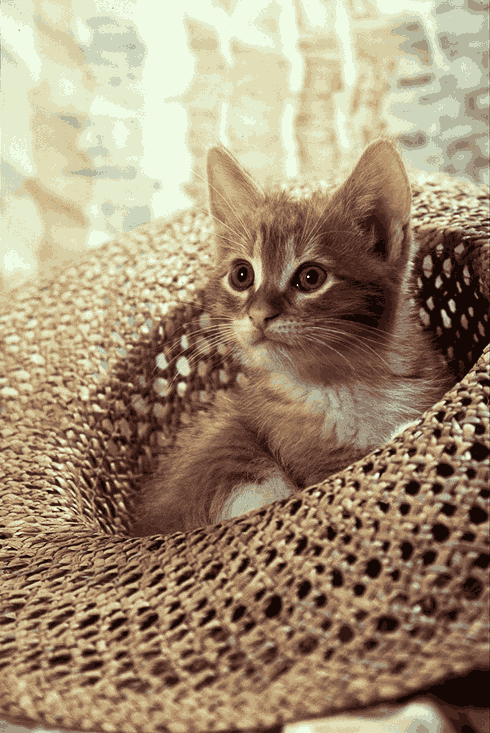

In [20]:
k20_image=Image.fromarray(reshaped_arr,'RGB')
k20_image

In [25]:
# k10_image was done previously and saved
#k10_image.save('compressed_cat_image.png')

#open k10_image to be used for visual comparison
k10_image=Image.open('compressed_cat_image.png')

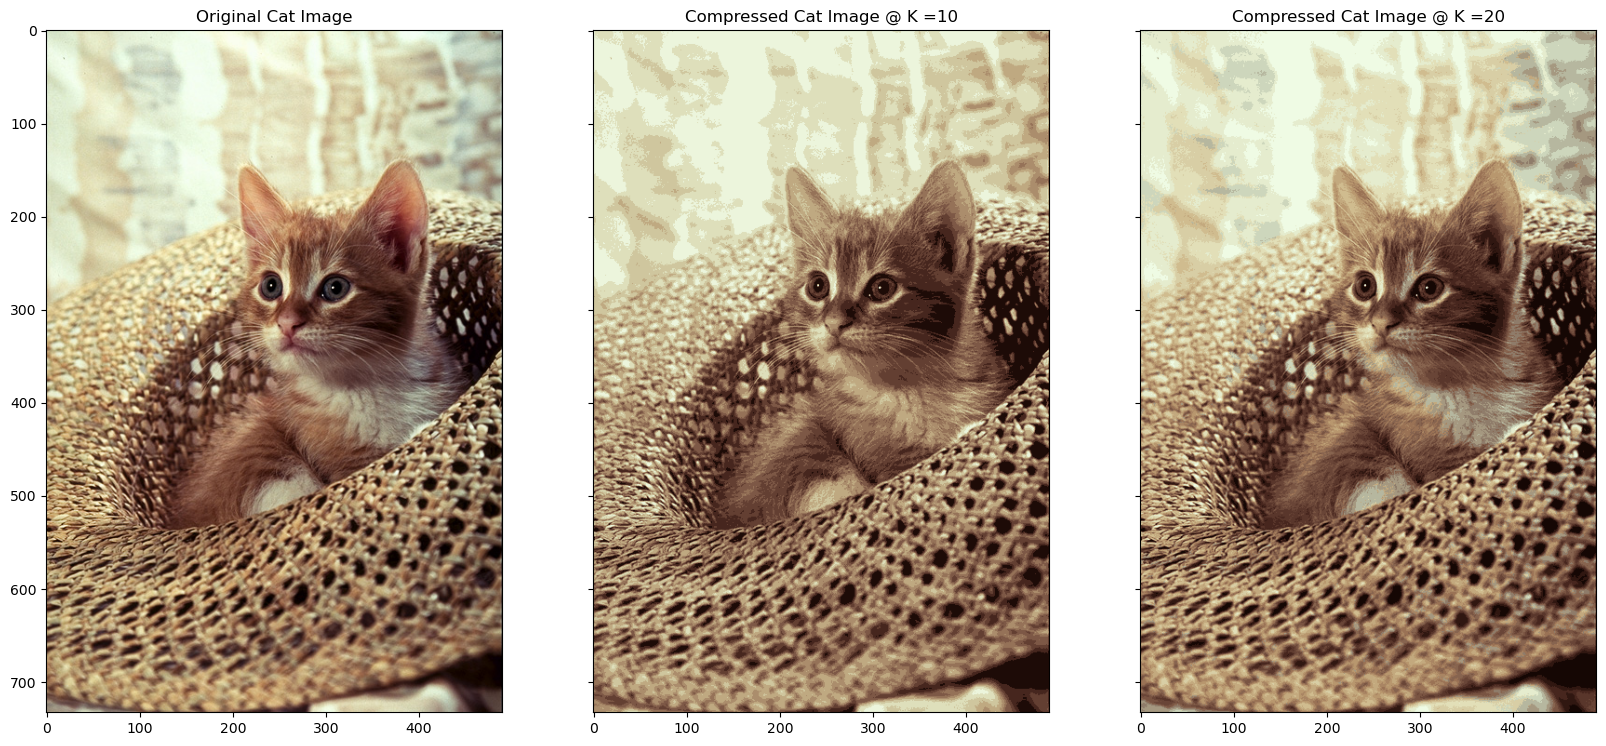

In [26]:
f, (original, k10, k20) = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(20,10))

original.set_title('Original Cat Image')
original.imshow(image)

k10.set_title('Compressed Cat Image @ K =10')
k10.imshow(k10_image)


k20.set_title('Compressed Cat Image @ K =20')
k20.imshow(k20_image)